In [3]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image

In [4]:
import os
import numpy as np
from PIL import Image

folder_path = r'D:\Project Files\ADNI'
images = []
common_size = (256, 256)
for root, dirs, files in os.walk(folder_path):  
    for file_name in files:
        if file_name.lower().endswith('.png'): 
            image_path = os.path.join(root, file_name)
            try:
                image = Image.open(image_path)
                image = image.resize(common_size) 
                image_data = np.array(image)
                images.append(image_data)
                print(f"Loaded {file_name} with shape {image_data.shape} from {root}")
            except Exception as e:
                print(f"Could not load {file_name}: {e}")

images = np.array(images)
print(f"Total images loaded: {len(images)}")


Loaded AD002_S_0816a076.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a077.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a078.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a079.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a080.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a081.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a082.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a083.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a084.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a085.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a086.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a087.png with shape (256, 256) from D:\Project Files\ADNI\AD
Loaded AD002_S_0816a088.png with shape (

In [5]:
images = []
labels = []

for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        if file_name.lower().endswith('.png'):
            image_path = os.path.join(root, file_name)
            try:
                image = Image.open(image_path)
                image = image.resize(common_size) 
                image_data = np.array(image)
                images.append(image_data)  
                label = os.path.basename(root) 
                labels.append(label) 
                
                print(f"Loaded {file_name} with shape {image_data.shape} from {root}, label: {label}")
            except Exception as e:
                print(f"Could not load {file_name}: {e}")

images = np.array(images)
labels = np.array(labels)
print(f"Total images loaded: {len(images)}, Total labels: {len(labels)}")


Loaded AD002_S_0816a076.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a077.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a078.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a079.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a080.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a081.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a082.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a083.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a084.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a085.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD
Loaded AD002_S_0816a086.png with shape (256, 256) from D:\Project Files\ADNI\AD, label: AD

In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

print(f"Encoded labels: {labels_encoded}")
print(f"Categorical labels: {labels_categorical}")


Encoded labels: [0 0 0 ... 2 2 2]
Categorical labels: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (4123, 256, 256), Testing set: (1031, 256, 256)


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  

model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))  
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

d:\Applications\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
print(X_train.shape)

(4123, 256, 256)


In [10]:
# If your images are grayscale
X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)  # Add channels dimension

# If your images are RGB
# X_train = X_train.reshape(X_train.shape[0], 256, 256, 3)  # Uncomment if images are RGB


In [11]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))  
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(np.unique(labels_encoded)), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,838,787 (56.61 MB)

 Trainable params: 14,838,787 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Reshape images to include the channel dimension (for grayscale images)
X_train = X_train.reshape(-1, 256, 256, 1)
X_test = X_test.reshape(-1, 256, 256, 1)


In [13]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 36s 334ms/step - accuracy: 0.4832 - loss: 1.0616 - val_accuracy: 0.6303 - val_loss: 0.8000
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 336ms/step - accuracy: 0.6558 - loss: 0.7506 - val_accuracy: 0.8909 - val_loss: 0.3067
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 35s 334ms/step - accuracy: 0.8706 - loss: 0.3232 - val_accuracy: 0.9721 - val_loss: 0.1101
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 330ms/step - accuracy: 0.9516 - loss: 0.1440 - val_accuracy: 0.9879 - val_loss: 0.0470
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.9571 - loss: 0.1088 - val_accuracy: 0.9915 - val_loss: 0.0313
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.9762 - loss: 0.0663 - val_accuracy: 0.9891 - val_loss: 0.0286
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 329ms/step - accuracy: 0.9734 - loss: 0.0656 - val_accuracy: 0.9939 - val_loss: 0.0158
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.9824 - loss: 0

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9966 - loss: 0.0129
Test Accuracy: 99.71%
Test Loss: 0.0123


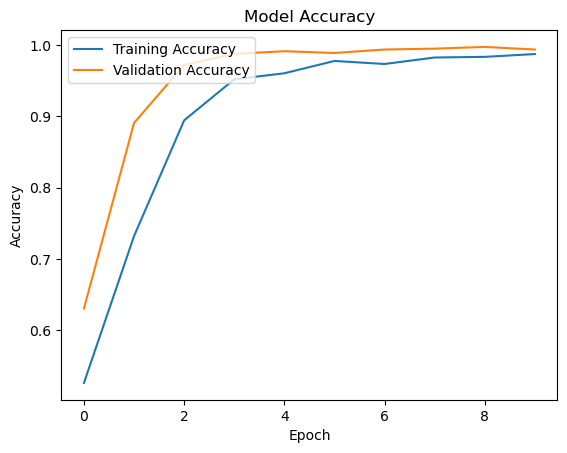

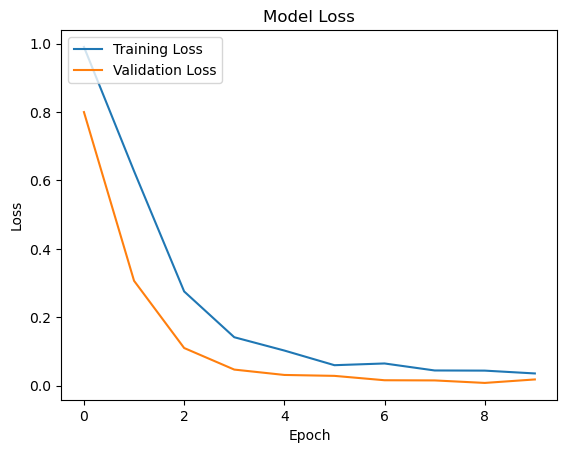

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [16]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

print(f"Predicted classes: {predicted_classes}")
print(f"True classes: {true_classes}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step
Predicted classes: [2 0 1 ... 1 1 1]
True classes: [2 0 1 ... 1 1 1]
